<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/SelfAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
import numpy as np

from scipy.special import softmax

In [1]:

model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [40]:
# Dimensions
embedding_dim = 300  # Dimension of the word2vec embeddings
projection_dim = 64  # Desired dimension for the query and key projections

# Initialize the projection matrices
W_q = np.random.randn(embedding_dim, projection_dim) * 0.01  # Query projection matrix
W_k = np.random.randn(embedding_dim, projection_dim) * 0.01  # Key projection matrix
# Initialize the values projection matrix
W_v = np.random.randn(embedding_dim, projection_dim) * 0.01  # Values projection matrix




In [41]:
words = ["the", "quick", "brown", "fox"]


In [42]:
vectors = np.array([model[word] for word in words])
# Project the word embeddings into the values space
values = np.dot(vectors, W_v)  # Projected values

In [44]:
# Compute the attention scores (dot product of queries and keys)
attention_scores = np.dot(queries, keys.T)

# Normalize the attention scores with softmax
attention_weights = softmax(attention_scores, axis=-1)

# Compute the weighted sum of values using the attention weights
attention_output = np.dot(attention_weights, values)



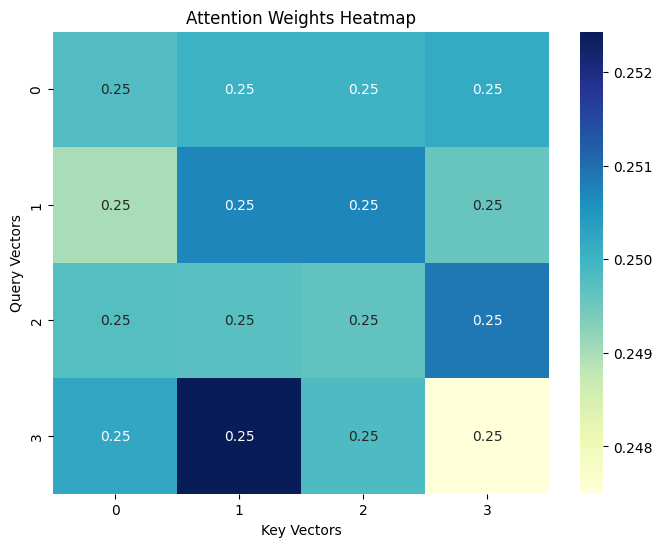

In [45]:

# Assuming `attention_weights` is your matrix of normalized attention scores
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu")
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Vectors")
plt.ylabel("Query Vectors")
plt.show()
